In [1]:
# !pip install snscrape
import snscrape.modules.twitter as sntwitter

In [2]:
query = "(Religious hate OR political hate OR gender bias OR hate speech OR caste hate)"
tweets = []
limit = int(input("How many Tweets do you want to collect: "))
# limit = 1000
count = 0

print(f"Collecting {limit} Tweets..")
single_tweet = ""
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    # print(type(vars(tweet)))
    # break
    if len(tweets) == limit:
        single_tweet = tweet
        print("{:.0f}% done".format((count/limit)*100))
        break
    else:
        print("{:.0f}% done".format((count/limit)*100), end="\r")
        count += 1
        a_tweet = vars(tweet)
        for key, value in a_tweet.items():
            # print(key, type(value))
            if ((type(value) != dict) or (type(value) != list)):
                a_tweet[key] = value
        tweets.append(a_tweet)

100% done


In [3]:
# Creating dataset from collected tweets

import pandas as pd

df = pd.DataFrame(tweets, columns=[key for key,_ in vars(tweet).items()])
df.to_csv("tweets.csv", index=False)
print("Dataset created from collected tweets..")

Dataset created from collected tweets..


In [4]:
unique_users = {}
cache = {}

count = 0

for tweet in tweets:
    if tweet["user"].id not in cache.keys():
        cache.update({tweet["user"].id: tweet["user"].username})
        unique_users.update({count: {"id":tweet["user"].id, "username":tweet["user"].username}})
        count += 1
    
    if tweet["mentionedUsers"]:
        for user in tweet["mentionedUsers"]:
            if user.id not in cache.keys():
                cache.update({user.id: user.username})
                unique_users.update({count: {"id":user.id, "username":user.username}})
                count += 1
print(f"{count} unique users found in available data")
cache.clear()

1083 unique users found in available data


In [5]:
print(cache)

{}


In [6]:
unique_users

{0: {'id': 2437129148, 'username': 'jamesma40672452'},
 1: {'id': 979628067017682946, 'username': 'helen_spirit1'},
 2: {'id': 1196074835639537667, 'username': 'VineetJ46459702'},
 3: {'id': 461841349, 'username': 'ZeeNews'},
 4: {'id': 399976215, 'username': 'ramuhmn'},
 5: {'id': 37034483, 'username': 'ndtv'},
 6: {'id': 2279949588, 'username': 'bulusu_'},
 7: {'id': 1255161552, 'username': 'LiveLawIndia'},
 8: {'id': 296612629, 'username': 'narendramodi_in'},
 9: {'id': 1447949844, 'username': 'AmitShah'},
 10: {'id': 3241214268, 'username': 'KirenRijiju'},
 11: {'id': 122658025, 'username': 'RajatSharmaLive'},
 12: {'id': 811972460560019456, 'username': 'republic'},
 13: {'id': 635895185, 'username': 'RShivshankar'},
 14: {'id': 177886974, 'username': 'gauravcsawant'},
 15: {'id': 2228240580, 'username': '23pradeepsingh'},
 16: {'id': 1534921351127269377, 'username': 'AjeetBhartii'},
 17: {'id': 1572594735889645572, 'username': 'Rakeshkumarmys'},
 18: {'id': 56304605, 'username': '

In [7]:
len(unique_users)

1083

In [8]:
rows,cols = len(unique_users),len(unique_users)

graph = [[0]*cols]*rows

print(f"A graph of {rows} x {cols} created..")

A graph of 1083 x 1083 created..


In [9]:
def return_count(uid):
    for key,value in unique_users.items():
        if value["id"]==uid:
            return key
            break

# print(return_count(1554550723043594246))

In [10]:
for tweet in tweets:
    rowNumber = return_count(tweet["user"].id)
    if tweet["mentionedUsers"]:
        for user in tweet["mentionedUsers"]:
            colNumber = return_count(user.id)
            graph[rowNumber][colNumber] = 1

In [11]:
import numpy as np

adjacency_matrix = np.array(graph)

print(adjacency_matrix)

[[0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 ...
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]]


In [12]:
## Save the output numpy array in .npy file for quick access in future

from numpy import save

save("data.npy", adjacency_matrix)
print("Adjacency Matrix stored in data.npy file as NumPy Array..")

Adjacency Matrix stored in data.npy file as NumPy Array..


In [13]:
### Continue from here after 'notebook' shutdown, if there is no change in chched data
import numpy as np

## Restore 'adjacency_matrix' from data.npy file

from numpy import load

adjacency_matrix = load("data.npy")
print(adjacency_matrix)

[[0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 ...
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]]


In [14]:
print(f"Size: {len(adjacency_matrix)} X {len(adjacency_matrix[0])}")
print(type(adjacency_matrix))

Size: 1083 X 1083
<class 'numpy.ndarray'>


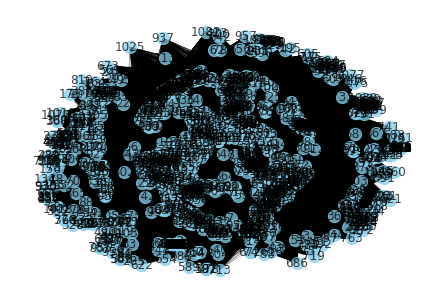

<Figure size 7200x7200 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix==1)
    edges = zip(rows.tolist(), cols.tolist())
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, node_size=150, with_labels=True, node_color="skyblue", width=0.25, alpha=0.75, edge_color="black")
    plt.figure(figsize=(100,100))
    plt.show()

# show_graph_with_labels(adjacency_matrix)
show_graph_with_labels(adjacency_matrix)

In [17]:
# import numpy as np

# np.savetxt("adjm.csv", adjacency_matrix, delimiter=",")

In [18]:
import pandas as pd 
pd.DataFrame(adjacency_matrix).to_csv("adjm2.csv")

In [21]:
print(adjacency_matrix)

# adjacency_matrix.tofile("adjm3.csv",sep=",")

[[0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 ...
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]]


In [27]:
# print(graph)

import csv

# with open("adjm3.csv","w",encoding='UTF8',newline='') as csv_file:
#     writer = csv.writer(csv_file)
#     for row in graph:
#         writer.writerow(row)

with open("adjm4.csv","w",encoding='UTF8',newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(graph)

In [ ]:
from collections import defaultdict
# converts from adjacency matrix to adjacency list
def convert(a):
    adjList = defaultdict(list)
    for i in range(len(a)):
        for j in range(len(a[i])):
                       if a[i][j]== 1:
                           adjList[i].append(j)
    return adjList

AdjList = convert(adjacency_matrix)
# print("Adjacency List:")
# print the adjacency list
# for i in AdjList:
#     print(i, end ="")
#     for j in AdjList[i]:
#         print(" -> {}".format(j), end ="")
#     print()

# print(AdjList)

import csv

with open("adjm5.csv","w",encoding='UTF8',newline='') as csv_file:
    writer = csv.writer(csv_file)
    for i in AdjList:
        AdjList[i].insert(0,i)
        writer.writerow(AdjList[i])

In [32]:
# creating nodes.csv file
import csv

with open("nodes.csv","w",encoding='UTF8',newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["id","label"])
    for i in AdjList:
        writer.writerow([i, str(i)])

In [33]:
# creating edges.csv file
import csv

with open("edges.csv","w",encoding='UTF8',newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Source","Target"])
    for i in AdjList:
        for j in AdjList[i]:
            writer.writerow([i,j])